# Cure Kinetics (21 points)

#### Thermoset resins, like epoxy, cure via chemical reactions. These reactions lead to covalent bonds being formed between monomers, forming the polymer. This process of curing is described as the degree of cure $\alpha$. Before any covalent bond is formed, the material exists solely out of monomers. In this case, it can be said that no convergence has happened and thus $\alpha = 0$. After adding hardener, the bonding of these monomers begins to form polymer chains. Once all monomers are attached to a polymer chain, via the mentioned covalent bonds, it can be said that the degree of cure $\alpha = 1$.

#### Chemical reactions occur through contact of two reactants. If these two reactants have more kinetic energy, they vibrate more. Then, it can be assumed that the number of collisions between two neighboring reactents will increase as well. Since temperature is movement on the microscale, an increase in temperature will have an effect on the curing of the thermoset. Also, when more time is given to two reactants, the probability of a necessary collision for bonding increases.
#### Therefore, we can say that the degree of cure $\alpha$ is a function of both temperature and time. $$\alpha = f(T,t)$$

#### Cure kinetics is concerned with the rates of the chemical reactions in a curing process. This is important, since the cure kinetics can help predict the thermoset cure and therefore also determines the manufacturing process and (partially) the final material properties. When cure kinetics are understood, they can be used to predict the degree of cure $\alpha$ of a certain process. To make a prediction like this, DSC measurement data can be used. The DSC process is explained in the lecture.

### Question 1 (1 point)
#### Attached are several .txt files which contain raw isothermal DSC measurements for different temperatures. In the cell below, plot the relevant DSC measurement data for all of these cases in a single figure. Don't forget to lable the axis (ylabel = H[W/g]), include units, and add a legend.
#### Note: if you edit the .txt files, be sure to include them when handing in this assignment.

In [6]:
#import packages here
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.integrate as integrate

In [14]:
#define masses of each specimen:
m1 = 14.400 #[mg]
m2 = 10.400 #[mg]
m3 = 13.700 #[mg]


## Read in 'lme_0_11.txt'
f = open(r'lme_0_11.txt','r')
lines = f.readlines()
f.close()
lines = lines[127:14525] #remove first lines without data
data_lst_11 = []
t11 = []
for i,line in enumerate(lines):
    line = line.strip('\n').strip(' ').split('\t')
    line = line[1::]
    if float(line[1])>0:
        data_lst_11.append(float(line[1]))
        t11.append(float(line[0]))

t11= np.array(t11)
data_arr_11 = np.array(data_lst_11)


## Read in 'lme_0_12b.txt'
f = open(r'lme_0_12b.txt','r')
lines = f.readlines()
f.close()
lines = lines[127:28865] #remove first lines without data
data_lst_12b = []
t12b = []
for i,line in enumerate(lines):
    line = line.strip('\n').strip(' ').split('\t')
    line = line[1::]
    if float(line[1])>0:
        data_lst_12b.append(float(line[1]))
        t12b.append(float(line[0]))

t12b = np.array(t12b)
data_arr_12b = np.array(data_lst_12b)


## Read in 'lme_0_12b.txt'
f = open(r'LME_0_13@161014121902.txt','r')
lines = f.readlines()
f.close()
lines = lines[277:86490] #remove first lines without data

data_lst_13 = []
t13 = []
for i,line in enumerate(lines):
    line = line.strip('\n').strip(' ').split('\t')
    line = line[1::]
    if float(line[1])>0:
        data_lst_13.append(float(line[1]))
        t13.append(float(line[0]))

t13 = np.array(t13)
data_arr_13 = np.array(data_lst_13)




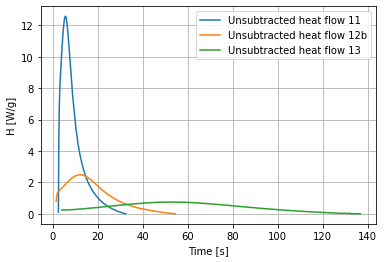

In [15]:
### plot the data
# plt.subplot(221)
plt.plot(t11,data_arr_11,label='Unsubtracted heat flow 11')
plt.plot(t12b,data_arr_12b,label='Unsubtracted heat flow 12b')
plt.plot(t13,data_arr_13,label='Unsubtracted heat flow 13')
plt.legend()
plt.grid(True)
plt.ylabel('H [W/g]')
plt.xlabel('Time [s]')
plt.show()

### Question 2 (2 points)
#### In the cell below, explain why and how isothermal DSC measurement data can be related to the curing rate of a thermoset resin. What happens at the peak?

#### As mentioned, the isothermal DSC data you just plotted can be used to obtain an estimation of degree of cure $\alpha$ vs. time $t$. To do this, it first has to be assumed that the heatflow is proportional to the degree of cure. $$\Delta H_{max} \equiv \alpha = 1$$
#### Then, this assumption is used to normalize the heatflow measurement. This normalized heatflow can now be related to the curing rate. $$\frac{d\alpha}{dt} = \frac{1}{\Delta H{max}} \frac{dH(t)}{dt}$$
#### Finally, integrating this result leads to the relationship of the degree of cure $\alpha$ vs. time $t$.

### Question 3 (4 points)
#### Use the information above to plot the degree of cure $\alpha$ vs. time $t$, using the provided data. Plot all cases in a single figure. Make sure to plot over a time interval which suits the results, include a legend and axes labels with units.

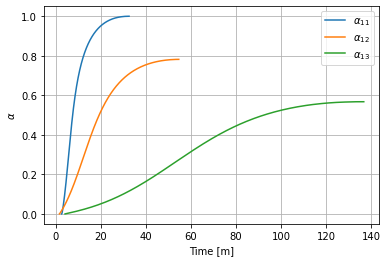

In [22]:
#divide Data by their corresponding masses to get dH/dt
y11 = data_arr_11/m1
#Then integrate and cumulate to get alpha
alpha11 = integrate.cumulative_trapezoid(y11,t11)



y12 = data_arr_12b/m2
alpha12 = integrate.cumulative_trapezoid(y12,t12b)


y13 = data_arr_13/m3
alpha13 = integrate.cumulative_trapezoid(y13,t13)

#divide alphas by absolute maximums
H_max = max(np.max(alpha11),np.max(alpha12),np.max(alpha13))
alpha11 /= H_max
alpha12 /= H_max
alpha13 /= H_max

plt.plot(t11[1::],alpha11,label='$\\alpha_{11}$')
plt.plot(t12b[1::],alpha12,label='$\\alpha_{12}$')
plt.plot(t13[1::],alpha13,label='$\\alpha_{13}$')
plt.xlabel(f'Time [m]')
plt.ylabel(f'$\\alpha$')
plt.legend()
plt.grid(True)
plt.show()
#integrate over dt

### Question 4 (2 points)
#### From your results of Question 3, you now have graphs which show degree of cure $\alpha$ vs. time $t$ for three different temperatures. Comment on the maximum degree of cure, which should be interpretable from the graphs. Why is the final degree of cure lower for a lower curing temperature?

Answer here

#### Several kinetics models exist which predict the curing rate of a resin. An example of one of the widely used models is the Kamal model, shown below. $$\frac{d\alpha}{dt} = (k_1 + k_2 \cdot \alpha^m)(1 - \alpha)^n$$
#### Where $k_1$ and $k_2$ are rate constants, and  $m$ and $n$ are reaction orders.

### Question 5 (4 points)
#### Use the experimental isothermal DSC data to estimate the parameters of the Kamal model. After obtaining these parameters, use them to create plots of conversion rate $d\alpha/dt$ vs. degree of conversion $\alpha$. Report the estimated parameters. Compare the results with the experimental results of $d\alpha/dt$ vs. $\alpha$. Do this for all 3 isothermal measurements.
#### Tip: Parameters can be estimated by: 1. making an inital guess of the parameters. 2. Minimizing the sum of squared errors between guess and data (fit to data), where $m, n, k1, k2$ should be the same for the three datasets.

### Question 6 (4 points)
#### As mentioned, the Kamal model is an example of a widely used cure kinetics model. Search online for a different cure kinetics model. Briefly discuss this model and its parameters. Now, estimate the parameters of your chosen model and compare the resulting plot to the Kamal model and the experimental data in the form of graphs. Plot all graphs in a single figure for good comparison.
#### NB: this time only the 150C case has to be considered.

#### As adressed at the start of this Notebook, thermoset polymers need to undergo a curing cycle to harden. During this curing cycle, covalent bonds are formed between monomers, forming the polymers. When not many bonds (crosslinks) have formed, the glass transition temperature of the material is relatively low. Once bonds form, the glass transition temperature increases. This can be indirectly observed by noticing that there is a change in state of a thermoset resin during the curing cycle.

### Question 7 (2 points)
#### Describe the glass transition temperature. Explain what happens (on a microscale level) with a material when it transitions through this value. Why is this value dependent on the degree of cure?

Answer here

#### For a thermosetting polymer, the following relation can be derived between the glass transition temperature $T_g$ and conversion $\alpha$. Equation 5 is called the Di Benedetto equation. 
$$ \frac{T_g - T_{g0}}{T_{g\infty} - T_{g0}} =  \frac{\lambda \alpha}{1 - (1 - \lambda)\alpha}  $$

#### For which $\lambda = \frac{\Delta C_p}{\Delta C_{p0}}$ is the ratio of the heat capacities of the fully reacted system and the initial system (therefore $\lambda < 1$), $T_{g\infty}$ is the Tg of the fully reacted system, and $T_{g0}$ is the Tg of the initial system.

### Question 8 (2 points)

#### Attached is a dataset containing Tg vs. convergence. The tested material is Airstone 780E.
#### Write a single function which takes the material characteristics $T_{g\infty}$, $T_{g0}$, and $\lambda$ as input arguments and returns a graph of the glass transition temperature $T_g$ vs. convergence $\alpha$. Then, plot this function and the Airstone 780E data in the same graph to compare the analytical model with the measurements.

#### $T_{g0}$ = -54.577, $T_{g\infty}$ = 88.853, $\lambda$ = 0.476.